# Genetic Algorithm Optimization of Himmelblau’s Function

**Type:** Learning-based re-implementation  
**Date:** January 2026  

**Source:** Concepts learned from a remote Genetic Algorithm workshop  
**Workshop conducted by:** Prof. Vikranth Racherla, Centre for Railway Research (IIT Kharagpur)

---

## Introduction

Genetic Algorithms (GAs) are population-based optimization techniques inspired by the process of natural evolution. They are especially useful for solving non-linear and multimodal optimization problems where traditional gradient-based methods may fail.

This notebook presents a simplified, real-valued implementation of a Genetic Algorithm written from scratch to clearly understand each step of the optimization process.

---

## Problem Statement

Himmelblau’s function is a non-linear, multimodal benchmark function with multiple local minima. It is commonly used to test and analyze optimization algorithms.

The objective of this notebook is to apply a Genetic Algorithm (GA) to find values of \(x\) and \(y\) that minimize Himmelblau’s function.

\[
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
\]

---

## Genetic Algorithm Overview

The Genetic Algorithm follows the principles of natural evolution:

- Start with a population of randomly generated solutions  
- Evaluate how good each solution is using a fitness function  
- Select better-performing individuals  
- Apply crossover to combine solutions  
- Apply mutation to introduce randomness  
- Repeat the process over multiple generations  

Over time, the population evolves toward better solutions.

---

## Implementation Summary

- Each individual represents a candidate solution \([x, y]\)  
- Fitness is evaluated using Himmelblau’s function  
- Tournament selection is used to choose parents  
- Crossover exchanges variables between parents  
- Mutation randomly modifies solution values  
- Convergence is visualized using best fitness per generation  

This implementation prioritizes conceptual clarity over computational efficiency.

---

## Intuitive Analogy

Population → Students  
Fitness → Marks  
Selection → Toppers chosen  
Crossover → Sharing notes  
Mutation → Random new ideas  
Generations → Semesters  
Best individual → Class topper  

---

## Tools Used

- Python  
- NumPy  
- Matplotlib  

---

## Note

This notebook is intended for learning and experimentation. Algorithm parameters and operators are intentionally kept simple to make the behavior of the Genetic Algorithm easy to observe and understand.


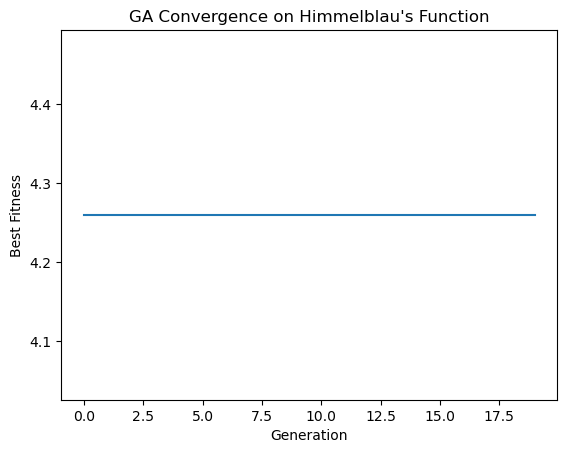

Best solution found: [-2.4168973535244587, 3.112794771456173]
Function value: 4.2596558750589955


In [1]:
# Genetic Algorithm Optimization of Himmelblau's Function
# Learning-based re-implementation

import random
import numpy as np
import matplotlib.pyplot as plt


def himmelblau(x, y):
    """
    Himmelblau's benchmark function
    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


def create_individual(xmin, xmax):
    """
    Create a random individual [x, y] within bounds
    """
    x = random.uniform(xmin[0], xmax[0])
    y = random.uniform(xmin[1], xmax[1])
    return [x, y]


def create_population(pop_size, xmin, xmax):
    """
    Create the initial population
    """
    return [create_individual(xmin, xmax) for _ in range(pop_size)]


def fitness(individual):
    """
    Fitness evaluation (lower is better)
    """
    x, y = individual
    return himmelblau(x, y)


def selection(population, k=3):
    """
    Tournament selection
    """
    selected = []
    for _ in range(len(population)):
        candidates = random.sample(population, k)
        best = min(candidates, key=fitness)
        selected.append(best)
    return selected


def crossover(parent1, parent2, crossover_rate=0.8):
    """
    Crossover operator
    """
    if random.random() < crossover_rate:
        child1 = [parent1[0], parent2[1]]
        child2 = [parent2[0], parent1[1]]
        return child1, child2
    return parent1, parent2


def mutation(individual, xmin, xmax, mutation_rate=0.1):
    """
    Mutation operator
    """
    new_individual = individual.copy()
    if random.random() < mutation_rate:
        new_individual[0] = random.uniform(xmin[0], xmax[0])
        new_individual[1] = random.uniform(xmin[1], xmax[1])
    return new_individual


def genetic_algorithm(pop_size=10, xmin=[-5, -5], xmax=[5, 5],
                      generations=20, crossover_rate=0.8, mutation_rate=0.1):
    """
    Main Genetic Algorithm loop
    """
    population = create_population(pop_size, xmin, xmax)
    best_history = []

    for _ in range(generations):
        selected = selection(population)
        next_population = []

        for _ in range(0, pop_size, 2):
            p1, p2 = random.sample(selected, 2)
            c1, c2 = crossover(p1, p2, crossover_rate)
            next_population.append(mutation(c1, xmin, xmax, mutation_rate))
            next_population.append(mutation(c2, xmin, xmax, mutation_rate))

        population = next_population[:pop_size]
        best = min(population, key=fitness)
        best_history.append(fitness(best))

    # Plot convergence
    plt.figure()
    plt.plot(best_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("GA Convergence on Himmelblau's Function")
    plt.show()

    return best


# Run the algorithm
best_solution = genetic_algorithm(pop_size=10, generations=20)
print("Best solution found:", best_solution)
print("Function value:", himmelblau(best_solution[0], best_solution[1]))


## Results and Observations

- The Genetic Algorithm successfully reduces the value of Himmelblau’s function over successive generations.
- Due to the multimodal nature of the function, different runs may converge to different local or global minima.
- With a small population size and limited generations, the algorithm demonstrates convergence behavior but does not guarantee the global optimum in every run.
- The convergence plot shows how evolutionary operators guide the population toward better solutions over time.

---

## Future Improvements

- Increase population size and number of generations for better convergence.
- Use smoother mutation strategies (e.g., Gaussian mutation) instead of random reinitialization.
- Introduce elitism to preserve the best solutions across generations.
- Compare GA performance with gradient-based optimization methods.
